In [1]:
# ============================================================
# Notebook setup
# ============================================================

#%load_ext autoreload
#%autoreload 2

# Control figure size
figsize=(14, 4)

from util import util
from tensorflow import keras
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

2023-07-05 11:46:09.778593: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 11:46:09.816644: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 11:46:09.817232: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 11:46:10.558216: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## A More Complex Objective

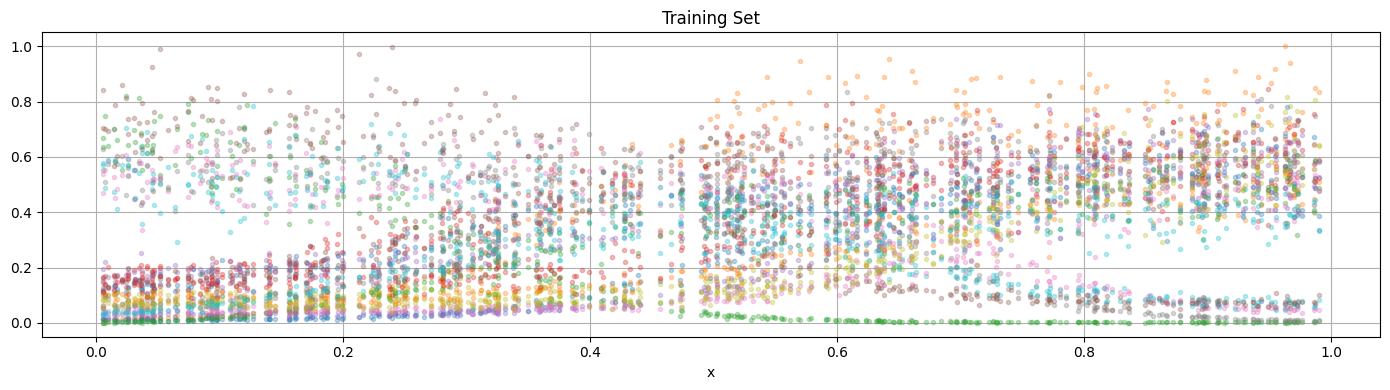

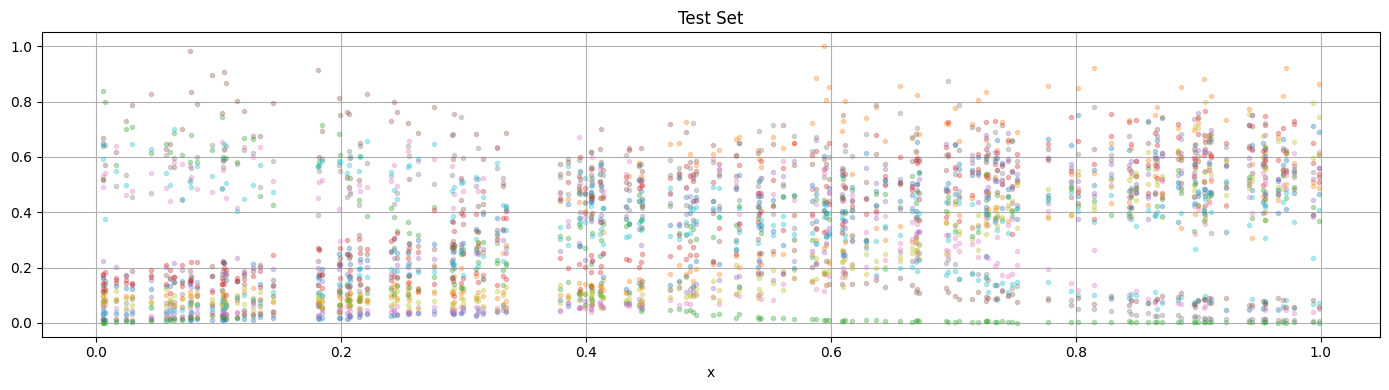

#Examples: 350 (training), 150 (test)


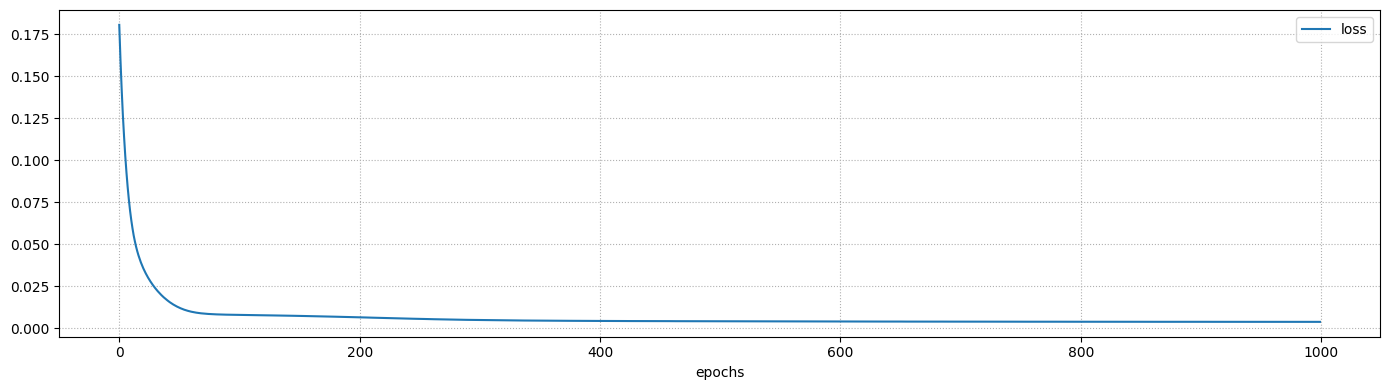

Final loss: 0.0037 (training)
R2: 0.90, MAE: 0.043, RMSE: 0.06 (training)
R2: 0.90, MAE: 0.043, RMSE: 0.06 (test)


In [229]:
import imp
imp.reload(util)

nitems = 20
nsamples_tr = 350
nsamples_ts = 150
nsamples_per_point_tr = 1
nsamples_per_point_ts = 1
noise_scale = 0.15
noise_type = 'normal'
noise_scale_type = 'relative'
rel_req = 0.6
rel_buffer_cost = 10
hidden = [16]

seed = 42

data_tr = util.generate_costs(nsamples_tr, nitems, seed=seed, sampling_seed=seed,
                              noise_scale=noise_scale, noise_type=noise_type, noise_scale_type=noise_scale_type,
                             nsamples_per_point=nsamples_per_point_tr)
data_ts = util.generate_costs(nsamples_ts, nitems, seed=seed, sampling_seed=seed+1,
                              noise_scale=noise_scale, noise_type=noise_type, noise_scale_type=noise_scale_type,
                             nsamples_per_point=nsamples_per_point_ts)

util.plot_df_cols(data_tr, figsize=figsize, title='Training Set', scatter=True)
util.plot_df_cols(data_ts, figsize=figsize, title='Test Set', scatter=True)

print(f'#Examples: {len(data_tr)} (training), {len(data_ts)} (test)')

tr_in, tr_out = data_tr.index.values, data_tr.values
ts_in, ts_out = data_ts.index.values, data_ts.values

pfl = util.build_nn_model(input_shape=1, output_shape=nitems, hidden=hidden, name='PFL', output_activation='linear')
history = util.train_nn_model(pfl, tr_in, tr_out, epochs=1000, loss='mse', validation_split=0)
util.plot_training_history(history, figsize=figsize)

r2, mae, rmse = util.get_ml_metrics(pfl, tr_in, tr_out)
print(f'R2: {r2:.2f}, MAE: {mae:.2}, RMSE: {rmse:.2f} (training)')
r2, mae, rmse = util.get_ml_metrics(pfl, ts_in, ts_out)
print(f'R2: {r2:.2f}, MAE: {mae:.2}, RMSE: {rmse:.2f} (test)')

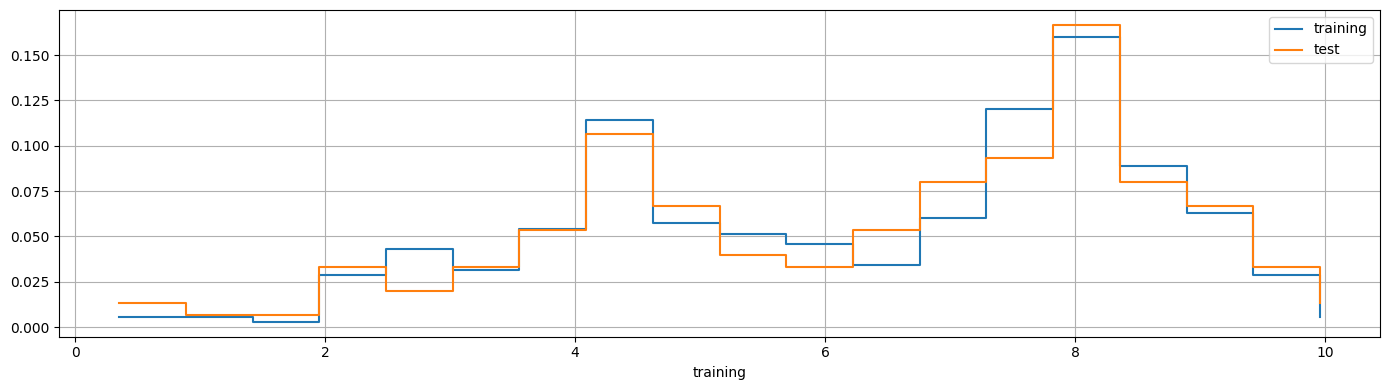

Mean: 6.375 (training), 6.400 (test)


In [243]:
import imp
imp.reload(util)

prb = util.generate_problem(nitems=nitems, rel_req=rel_req, seed=seed, surrogate=True)

#tc_tr = util.compute_regret_surrogate(prb, pfl, data_tr, tlim=10, cost_only=False, samples_per_item=11)
#tc_ts = util.compute_regret_surrogate(prb, pfl, data_ts, tlim=10, cost_only=False, samples_per_item=11)
#util.plot_histogram(tc_tr, figsize=figsize, label='training', data2=tc_ts, label2='test', print_mean=True)

tc_tr = util.compute_regret_surrogate(prb, pfl, data_tr, tlim=10, cost_only=True, samples_per_item=11)
tc_ts = util.compute_regret_surrogate(prb, pfl, data_ts, tlim=10, cost_only=True, samples_per_item=11)
util.plot_histogram(tc_tr, figsize=figsize, label='training', data2=tc_ts, label2='test', print_mean=True)

## Surrogate Based Solution

Epoch 1/200
6/6 [==============================] - 1s 111ms/step - loss: 19.7651 - sigma: 0.2006 - sample_cost: 5.3431
Epoch 2/200
6/6 [==============================] - 1s 111ms/step - loss: 20.1442 - sigma: 0.2007 - sample_cost: 5.4181
Epoch 3/200
6/6 [==============================] - 1s 110ms/step - loss: 19.1160 - sigma: 0.2006 - sample_cost: 5.2440
Epoch 4/200
6/6 [==============================] - 1s 110ms/step - loss: 20.6037 - sigma: 0.2005 - sample_cost: 5.2920
Epoch 5/200
6/6 [==============================] - 1s 113ms/step - loss: 21.8285 - sigma: 0.2007 - sample_cost: 5.2642
Epoch 6/200
6/6 [==============================] - 1s 109ms/step - loss: 20.1838 - sigma: 0.2012 - sample_cost: 5.1838
Epoch 7/200
6/6 [==============================] - 1s 109ms/step - loss: 19.1069 - sigma: 0.2016 - sample_cost: 5.1449
Epoch 8/200
6/6 [==============================] - 1s 109ms/step - loss: 18.2142 - sigma: 0.2019 - sample_cost: 5.0640
Epoch 9/200
6/6 [==============================]

6/6 [==============================] - 1s 112ms/step - loss: 9.3512 - sigma: 0.2062 - sample_cost: 2.9538
Epoch 70/200
6/6 [==============================] - 1s 115ms/step - loss: 9.8236 - sigma: 0.2062 - sample_cost: 3.0566
Epoch 71/200
6/6 [==============================] - 1s 112ms/step - loss: 10.8790 - sigma: 0.2062 - sample_cost: 3.1454
Epoch 72/200
6/6 [==============================] - 1s 109ms/step - loss: 9.7621 - sigma: 0.2064 - sample_cost: 3.0638
Epoch 73/200
6/6 [==============================] - 1s 109ms/step - loss: 10.0030 - sigma: 0.2066 - sample_cost: 3.0074
Epoch 74/200
6/6 [==============================] - 1s 108ms/step - loss: 9.3612 - sigma: 0.2068 - sample_cost: 3.0881
Epoch 75/200
6/6 [==============================] - 1s 108ms/step - loss: 8.5904 - sigma: 0.2068 - sample_cost: 3.0409
Epoch 76/200
6/6 [==============================] - 1s 108ms/step - loss: 8.0806 - sigma: 0.2065 - sample_cost: 2.9620
Epoch 77/200
6/6 [==============================] - 1s 112m

6/6 [==============================] - 1s 121ms/step - loss: 10.0267 - sigma: 0.1971 - sample_cost: 2.6105
Epoch 138/200
6/6 [==============================] - 1s 111ms/step - loss: 9.2065 - sigma: 0.1970 - sample_cost: 2.5775
Epoch 139/200
6/6 [==============================] - 1s 117ms/step - loss: 10.0425 - sigma: 0.1966 - sample_cost: 2.4747
Epoch 140/200
6/6 [==============================] - 1s 108ms/step - loss: 10.2063 - sigma: 0.1962 - sample_cost: 2.4967
Epoch 141/200
6/6 [==============================] - 1s 97ms/step - loss: 9.1185 - sigma: 0.1959 - sample_cost: 2.4633
Epoch 142/200
6/6 [==============================] - 1s 106ms/step - loss: 9.5729 - sigma: 0.1956 - sample_cost: 2.5131
Epoch 143/200
6/6 [==============================] - 1s 119ms/step - loss: 9.9905 - sigma: 0.1951 - sample_cost: 2.4213
Epoch 144/200
6/6 [==============================] - 1s 114ms/step - loss: 11.6584 - sigma: 0.1947 - sample_cost: 2.5420
Epoch 145/200
6/6 [==============================] 

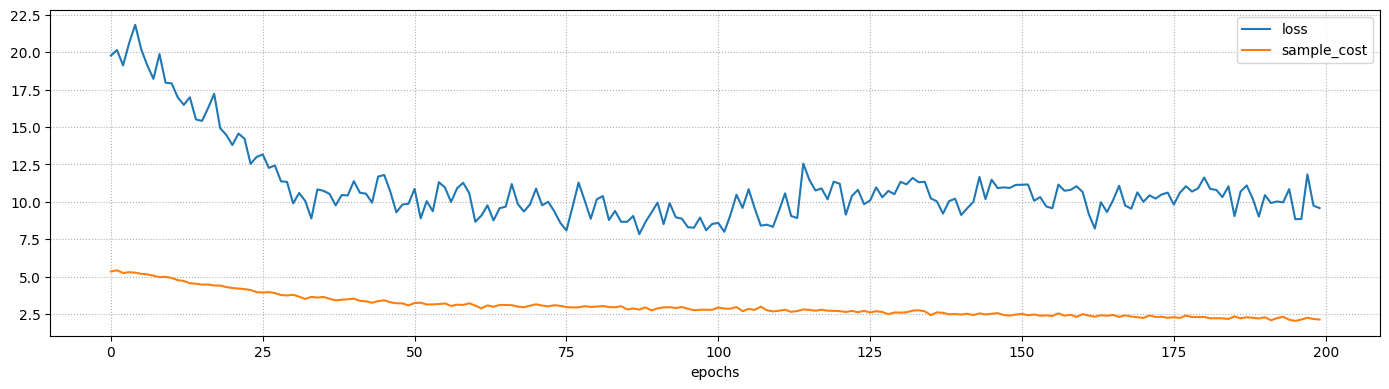

Final loss: 9.5781 (training)
R2: -6.32, MAE: 0.43, RMSE: 0.56 (training)
R2: -6.55, MAE: 0.44, RMSE: 0.57 (test)


In [244]:
import imp
imp.reload(util)

#from tensorflow import keras
#opt = keras.optimizers.Adam(learning_rate=1e-5)
opt = 'Adam'

sfge = util.build_dfl_ml_model(input_size=1, output_size=nitems, problem=prb,
                               hidden=hidden, name='sfge', output_activation='linear',
                               loss_type='cost', surrogate=True,
                               sfge=True, sfge_sigma_init=0.2, sfge_sigma_trainable=True)

pfl_weights = pfl.get_weights()
sfge_weights = sfge.get_weights()
init_weights = pfl_weights[:len(pfl_weights)] + sfge_weights[len(pfl_weights):]
sfge.set_weights(init_weights)

%time history = util.train_dfl_model(sfge, tr_in, tr_out, epochs=200, verbose=1, validation_split=0, optimizer=opt, batch_size=64)
util.plot_training_history(history, figsize=figsize, excluded_metrics=['sigma'])

r2, mae, rmse = util.get_ml_metrics(sfge, tr_in, tr_out)
print(f'R2: {r2:.2f}, MAE: {mae:.2}, RMSE: {rmse:.2f} (training)')
r2, mae, rmse = util.get_ml_metrics(sfge, ts_in, ts_out)
print(f'R2: {r2:.2f}, MAE: {mae:.2}, RMSE: {rmse:.2f} (test)')

#r_ts_sfge = util.compute_regret(prb, sfge, ts_in, ts_out)
#util.plot_histogram(r_ts_spo, figsize=figsize, label='spo', data2=r_ts, label2='two stage', print_mean=True)

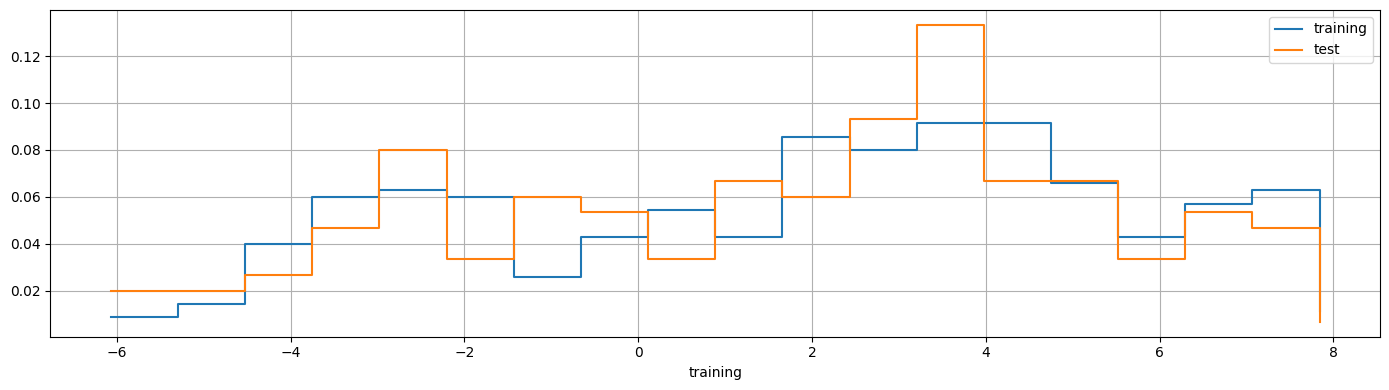

Mean: 1.929 (training), 1.730 (test)


In [245]:
import imp
imp.reload(util)

#tc_tr = util.compute_regret_surrogate(prb, sfge, data_tr, tlim=10, cost_only=False, samples_per_item=11)
#tc_ts = util.compute_regret_surrogate(prb, sfge, data_ts, tlim=10, cost_only=False, samples_per_item=11)
#util.plot_histogram(tc_tr, figsize=figsize, label='training', data2=tc_ts, label2='test', print_mean=True)

tc_tr = util.compute_regret_surrogate(prb, sfge, data_tr, tlim=10, cost_only=True)
tc_ts = util.compute_regret_surrogate(prb, sfge, data_ts, tlim=10, cost_only=True)
util.plot_histogram(tc_tr, figsize=figsize, label='training', data2=tc_ts, label2='test', print_mean=True)